# Análise Exploratória 

Para realização desta análise exploratória, foi considerado o conjunto de dados resultante da etapa de processamento e tratamento dos dados.

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from database_utils import NormalityTest, NonParamTest

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Leitura da base após etapa de processamento
df = pd.read_csv(filepath_or_buffer='df_tratado.csv', sep=';', encoding='utf-8', decimal=',')  

In [3]:
df.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,...,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q027,NU_NOTA_TOT,IN_RENDIMENTO
0,RO,17.0,M,0,1,1,4,1,4,1,...,D,B,A,D,B,B,B,B,2932.9,0.984189
1,RO,17.0,F,0,3,1,4,1,4,1,...,B,A,A,D,B,B,B,D,2790.0,0.984189
2,RO,17.0,F,0,1,1,4,1,4,1,...,C,A,B,C,A,C,B,D,3090.2,0.984189
3,RO,17.0,M,0,1,1,4,1,4,1,...,C,B,B,E,B,C,B,D,2908.3,0.984189
4,RO,18.0,M,0,3,1,4,1,4,1,...,B,B,A,E,B,C,B,E,3365.2,0.984189


In [4]:
# Listando variáveis explicativas qualitativas
col_list =  ['SG_UF_RESIDENCIA',
             'TP_SEXO',
             'TP_ESTADO_CIVIL',
             'TP_COR_RACA',
             'TP_NACIONALIDADE',
             'TP_ESCOLA',
             'TP_ENSINO',
             'TP_DEPENDENCIA_ADM_ESC',
             'TP_LOCALIZACAO_ESC',
             'TP_SIT_FUNC_ESC',
             'TP_LINGUA',
             'Q001',
             'Q002',
             'Q003',
             'Q004',
             'Q006',
             'Q007',
             'Q008',
             'Q009',
             'Q010',
             'Q011',
             'Q012',
             'Q013',
             'Q014',
             'Q015',
             'Q016',
             'Q017',
             'Q018',
             'Q019',
             'Q020',
             'Q021',
             'Q022',
             'Q023',
             'Q024',
             'Q025',
             'Q027']

# Garantindo que todas serão tratadas como qualitativas
for col in col_list:
    df[col] = df[col].astype(object)

## Análise da Variável Resposta

In [5]:
# Configurando tamanho da fonte dos gráficos
sns.set(font_scale = 1.5)

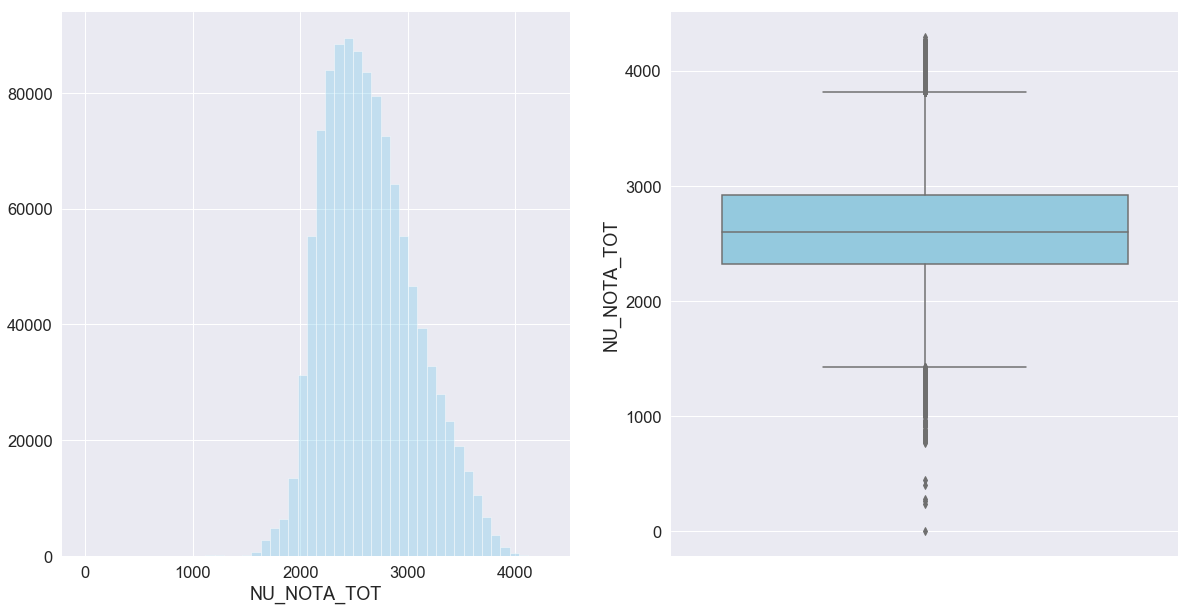

In [6]:
# Criando histograma e box plot de distribuição das notas obtidas pelos participantes no ENEM 2018
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))

sns.despine(fig, left = True, bottom = True)
sns.distplot(df['NU_NOTA_TOT'], kde = False, ax = ax1, color = 'skyblue')
sns.boxplot(y = 'NU_NOTA_TOT', data = df, orient = 'v', ax = ax2, color = 'skyblue')

In [7]:
# Estatísticas de resumo da variável resposta
df['NU_NOTA_TOT'].describe()

count    1.119954e+06
mean     2.646501e+03
std      4.251977e+02
min      0.000000e+00
25%      2.324200e+03
50%      2.597000e+03
75%      2.921400e+03
max      4.290900e+03
Name: NU_NOTA_TOT, dtype: float64

In [8]:
# Coeficiente de assimetria de Pearson
df['NU_NOTA_TOT'].skew(axis = 0)

0.4514031576912852

In [9]:
# Verificando perfil do participante que obteve melhor desempenho
df[df['NU_NOTA_TOT'] == 4290.9]

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,...,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q027,NU_NOTA_TOT,IN_RENDIMENTO
381721,SE,17.0,M,0,1,1,4,1,4,1,...,D,B,A,D,A,B,B,D,4290.9,0.995657


In [10]:
# Verificando perfil do participante que obteve pior desempenho
df[df['NU_NOTA_TOT'] == 0]

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,...,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q027,NU_NOTA_TOT,IN_RENDIMENTO
678038,SP,50.0,F,0,3,1,2,3,2,1,...,B,B,A,B,B,B,B,A,0.0,0.754134


## Análise das Variáveis Explicativas Quantitativas

In [11]:
# Verificando as estatísticas de resumo das variáveis explicativas quantitativas
df[['NU_IDADE', 'Q005', 'IN_RENDIMENTO']].describe()

,NU_IDADE,Q005,IN_RENDIMENTO
count,1.119954e+06,1.119954e+06,1.119954e+06
mean,1.804729e+01,4.091087e+00,8.469828e-01
std,2.888950e+00,1.373328e+00,9.906571e-02
min,1.000000e+01,1.000000e+00,2.196347e-01
25%,1.700000e+01,3.000000e+00,7.861818e-01
50%,1.800000e+01,4.000000e+00,8.535314e-01
75%,1.800000e+01,5.000000e+00,9.195236e-01
max,8.500000e+01,2.000000e+01,1.000000e+00


In [12]:
# Aplicando testes de normalidade para verificar a distribuição (considerando nível de significância de 5%)
normality_output = NormalityTest(df = df, alpha = 0.05)
normality_output

,Variável,Shapiro Wilk Result,D Agostinos K2 Result
0,NU_IDADE,Amostra não possui distribuição gaussiana (Rej...,Amostra não possui distribuição gaussiana (Rej...
1,Q005,Amostra não possui distribuição gaussiana (Rej...,Amostra não possui distribuição gaussiana (Rej...
2,NU_NOTA_TOT,Amostra não possui distribuição gaussiana (Rej...,Amostra não possui distribuição gaussiana (Rej...
3,IN_RENDIMENTO,Amostra não possui distribuição gaussiana (Rej...,Amostra não possui distribuição gaussiana (Rej...


In [13]:
# Cálculo do coeficiente de correlação de Spearman, uma vez que a normalidade não foi detectada nos testes anteriores
corr_matrix = df.corr(method = 'spearman')

# Como a matriz é simétrica, basta extrair uma das matrizes triangulares acima ou abaixo da diagonal principal (k=1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
                 .stack()
                 .sort_values(ascending = False))

sol

NU_NOTA_TOT  IN_RENDIMENTO    0.151898
NU_IDADE     Q005             0.018392
Q005         IN_RENDIMENTO   -0.013340
             NU_NOTA_TOT     -0.105745
NU_IDADE     IN_RENDIMENTO   -0.147483
             NU_NOTA_TOT     -0.259115
dtype: float64

## Análise das Variáveis Explicativas Qualitativas

In [14]:
# Aplicando testes não-paramétricos de Mann-Whitney e Kruskal-Wallis para verificar compararar a distribuição da variável
# resposta de acordo com as categorias das variáveis 

# A função retorna o resultado, seguido do valor-p considerando um nível de significância de 5% e a variável correspondente
for colx in col_list:
    NonParamTest(df = df, col = colx)

Distribuições diferentes (Rejeita-se H0) 0.0 SG_UF_RESIDENCIA
Distribuições diferentes (Rejeita-se H0) 0.0 TP_SEXO
Distribuições diferentes (Rejeita-se H0) 0.0 TP_ESTADO_CIVIL
Distribuições diferentes (Rejeita-se H0) 0.0 TP_COR_RACA
Distribuições diferentes (Rejeita-se H0) 0.0 TP_NACIONALIDADE
Distribuições diferentes (Rejeita-se H0) 0.0 TP_ESCOLA
Distribuições diferentes (Rejeita-se H0) 0.0 TP_ENSINO
Distribuições diferentes (Rejeita-se H0) 0.0 TP_DEPENDENCIA_ADM_ESC
Distribuições diferentes (Rejeita-se H0) 0.0 TP_LOCALIZACAO_ESC
Distribuições diferentes (Rejeita-se H0) 0.0 TP_SIT_FUNC_ESC
Distribuições diferentes (Rejeita-se H0) 0.0 TP_LINGUA
Distribuições diferentes (Rejeita-se H0) 0.0 Q001
Distribuições diferentes (Rejeita-se H0) 0.0 Q002
Distribuições diferentes (Rejeita-se H0) 0.0 Q003
Distribuições diferentes (Rejeita-se H0) 0.0 Q004
Distribuições diferentes (Rejeita-se H0) 0.0 Q006
Distribuições diferentes (Rejeita-se H0) 0.0 Q007
Distribuições diferentes (Rejeita-se H0) 0.0 Q0

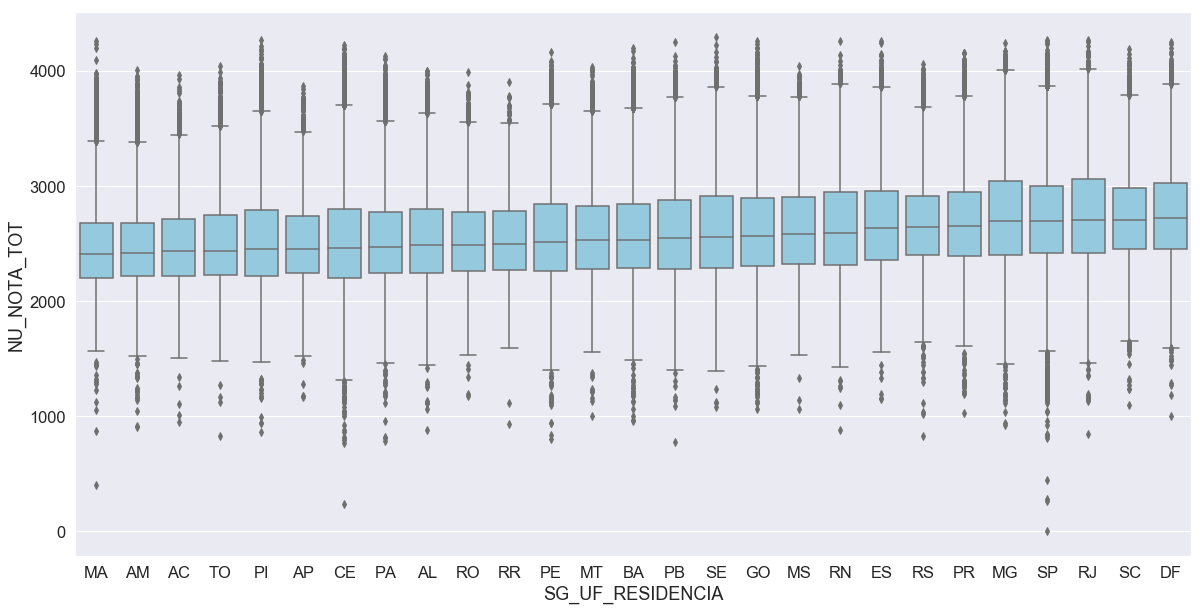

In [15]:
# Criando box plot de distribuição das notas obtidas pelos participantes no ENEM 2018 de acordo com a Unidade da Federação
plt.figure(figsize = (20, 10))

my_order = df.groupby(by = ['SG_UF_RESIDENCIA'])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = 'SG_UF_RESIDENCIA', y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue")

In [16]:
# Verificando estatísticas de resumo desse boxplot (+ cálculo do intervalo interquartílico)
aux = df.groupby(by = ['SG_UF_RESIDENCIA'])['NU_NOTA_TOT'].describe()
aux['iqr'] = aux.iloc[:, 6] - aux.iloc[:, 4]
aux.sort_values(by = 'iqr', ascending = False)

,count,mean,std,min,25%,50%,75%,max,iqr
SG_UF_RESIDENCIA,,,,,,,,,
MG,111891.0,2742.620774,443.296353,926.5,2402.400,2694.30,3043.100,4238.2,640.700
RJ,81027.0,2755.616744,442.263571,840.8,2418.200,2705.90,3056.200,4266.1,638.000
RN,18932.0,2652.054268,437.042693,879.2,2314.800,2591.95,2945.225,4255.1,630.425
SE,13627.0,2630.608116,450.565198,1081.7,2285.700,2556.20,2915.300,4290.9,629.600
ES,25803.0,2682.105542,431.010716,1149.5,2354.200,2634.80,2957.050,4256.5,602.850
CE,86817.0,2528.498101,437.602680,240.0,2201.900,2457.70,2800.900,4218.7,599.000
PB,24071.0,2608.880985,431.156631,779.8,2281.300,2548.00,2877.800,4244.5,596.500
GO,42701.0,2627.660397,429.531369,1060.3,2302.300,2564.60,2892.100,4261.0,589.800
MS,14067.0,2632.920210,415.788334,1066.2,2316.850,2579.10,2900.450,4037.9,583.600


<Figure size 1440x720 with 0 Axes>

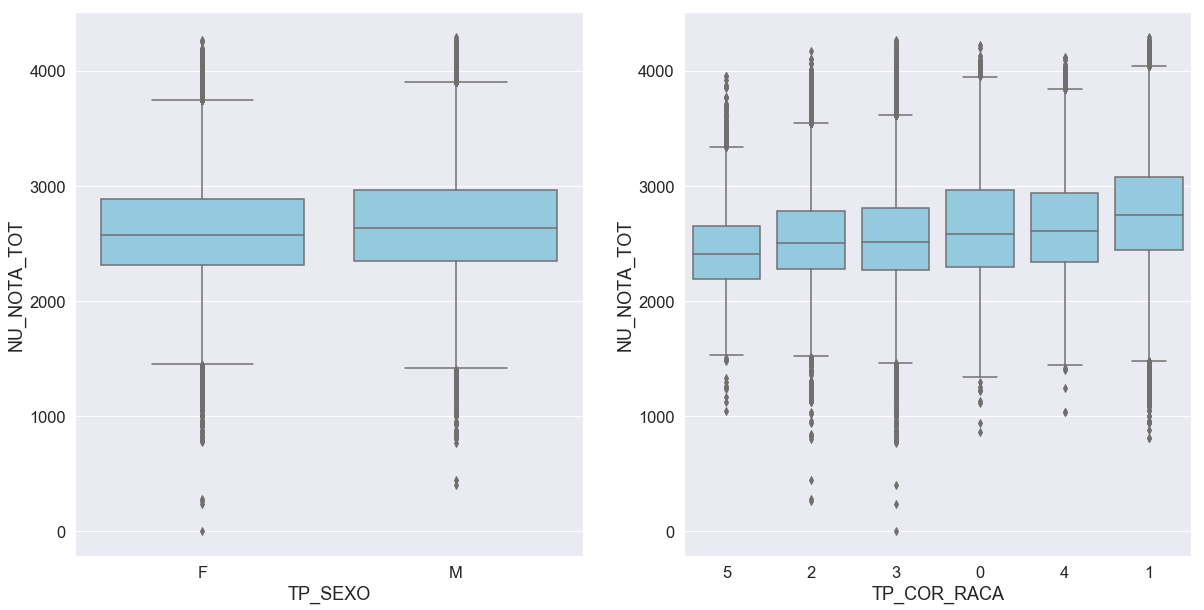

In [17]:
# Criando box plot de distribuição das notas obtidas pelos participantes no ENEM 2018 de acordo com:

plt.figure(figsize = (20, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

# Sexo
my_order = df.groupby(by = [col_list[1]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[1], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax1)

# Cor/raça
my_order = df.groupby(by = [col_list[3]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[3], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax2)

In [18]:
# Verificando estatísticas de resumo de acordo com o sexo
aux = df.groupby(by = [col_list[1]])['NU_NOTA_TOT'].describe()
aux

,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
F,644233.0,2623.480695,414.461126,0.0,2310.6,2569.3,2885.5,4262.9
M,475721.0,2677.675417,437.392692,400.0,2345.5,2636.8,2967.8,4290.9


In [19]:
# Verificando estatísticas de resumo de acordo com a cor
aux = df.groupby(by = [col_list[3]])['NU_NOTA_TOT'].describe()
aux['iqr'] = aux.iloc[:, 6] - aux.iloc[:, 4]
aux

,count,mean,std,min,25%,50%,75%,max,iqr
TP_COR_RACA,,,,,,,,,
0,22364.0,2655.696159,464.381482,864.0,2299.000,2585.6,2959.550,4222.1,660.55
1,437819.0,2775.362298,438.146253,807.2,2441.400,2742.6,3080.800,4290.9,639.40
2,122847.0,2547.047977,370.323166,260.0,2274.450,2507.6,2782.000,4169.6,507.55
3,504629.0,2560.523507,395.009586,0.0,2267.100,2509.2,2806.500,4262.9,539.40
4,25306.0,2663.206959,427.297502,1035.1,2337.925,2608.3,2938.775,4114.3,600.85
5,6989.0,2440.148204,354.993824,1043.3,2194.200,2404.7,2650.500,3953.4,456.30


<Figure size 1440x720 with 0 Axes>

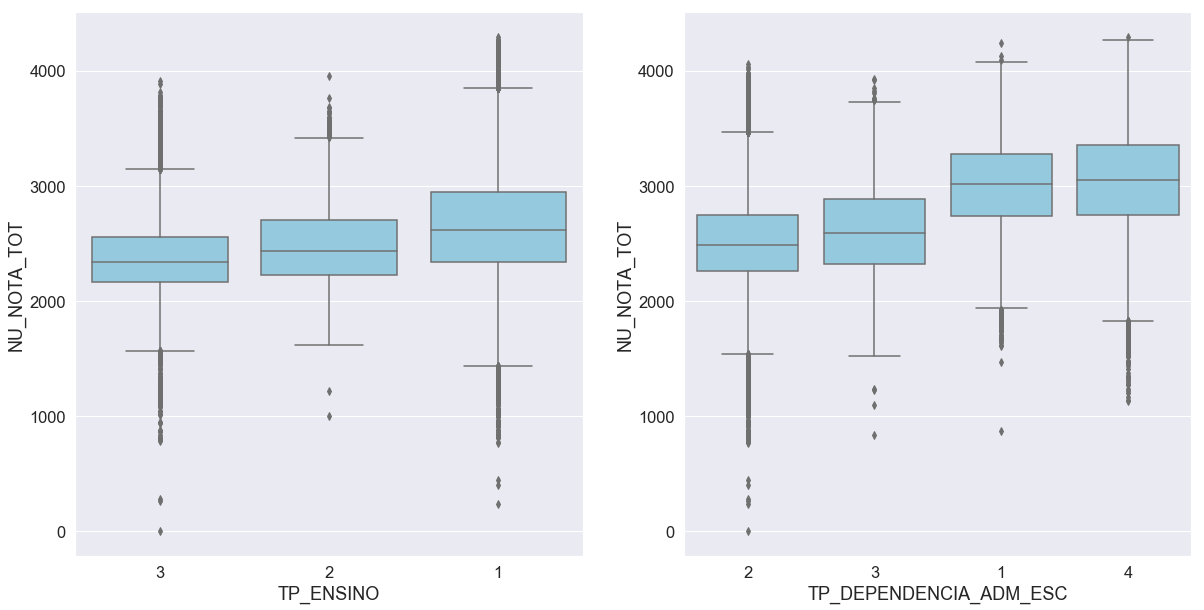

In [20]:
# Criando box plot de distribuição das notas obtidas pelos participantes no ENEM 2018 de acordo com:

plt.figure(figsize = (20, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

# Tipo de instituição que concluiu ou concluirá o Ensino Médio 
my_order = df.groupby(by = [col_list[6]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[6], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax1)

# Dependência administrativa (Escola)
my_order = df.groupby(by = [col_list[7]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[7], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax2)

In [21]:
# Verificando estatísticas de resumo de acordo com a dependência administrativa
aux = df.groupby(by = [col_list[7]])['NU_NOTA_TOT'].describe()
aux['median'] = df.groupby(by = [col_list[7]])['NU_NOTA_TOT'].median()
aux

,count,mean,std,min,25%,50%,75%,max,median
TP_DEPENDENCIA_ADM_ESC,,,,,,,,,
1,42568.0,3000.679022,382.537022,871.2,2739.70,3019.75,3276.900,4238.9,3019.75
2,830124.0,2516.713949,344.233510,0.0,2262.70,2486.70,2744.425,4058.4,2486.70
3,9651.0,2611.524422,378.464892,834.3,2320.25,2593.90,2884.550,3923.8,2593.90
4,237611.0,3037.897608,414.210967,1132.9,2742.70,3052.90,3352.550,4290.9,3052.90


<Figure size 1440x720 with 0 Axes>

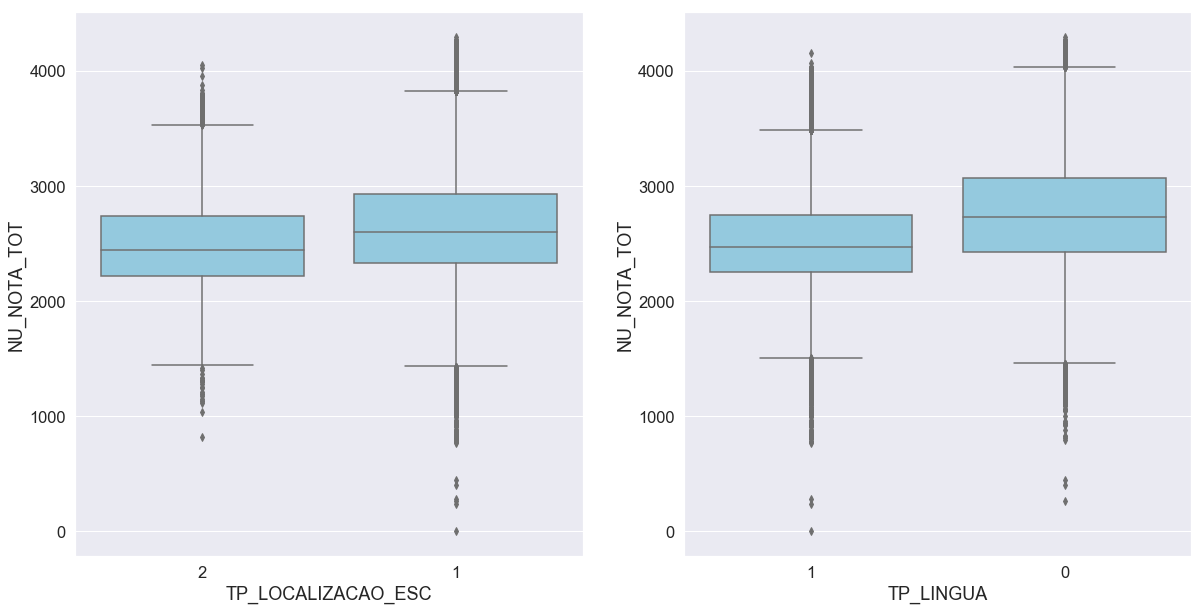

In [22]:
# Criando box plot de distribuição das notas obtidas pelos participantes no ENEM 2018 de acordo com:

plt.figure(figsize = (20, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

# Localização (Escola)
my_order = df.groupby(by = [col_list[8]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[8], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax1)

# Língua Estrangeira 
my_order = df.groupby(by = [col_list[10]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[10], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax2)

In [23]:
# Verificando estatísticas de resumo de acordo com a localização da escola
aux = df.groupby(by = [col_list[8]])['NU_NOTA_TOT'].describe()
aux['median'] = df.groupby(by = [col_list[8]])['NU_NOTA_TOT'].median()
aux

,count,mean,std,min,25%,50%,75%,max,median
TP_LOCALIZACAO_ESC,,,,,,,,,
1,1084622.0,2651.445475,425.734613,0.0,2328.7,2602.4,2926.9,4290.9,2602.4
2,35332.0,2494.712204,378.128755,819.0,2214.7,2440.9,2741.2,4053.1,2440.9


# Questões do questionário socieconômico

<Figure size 1440x720 with 0 Axes>

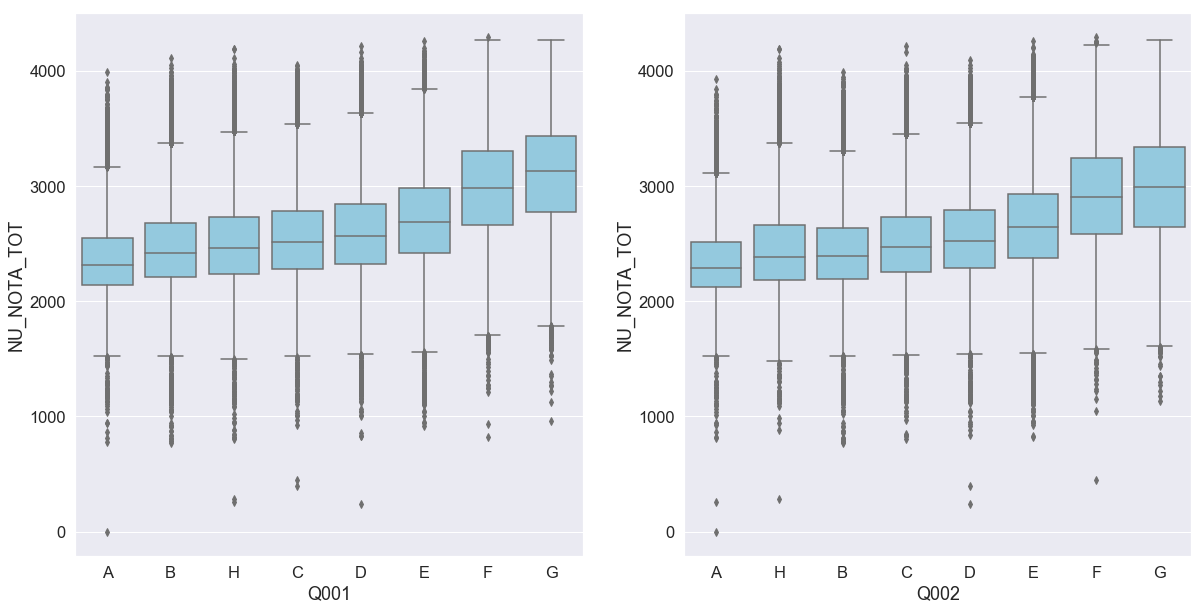

In [24]:
# Criando box plot de distribuição das notas obtidas pelos participantes no ENEM 2018 de acordo com:

plt.figure(figsize = (20, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

# Até que série seu pai, ou o homem responsável por você, estudou?
my_order = df.groupby(by = [col_list[11]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[11], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax1)

# Até que série sua mãe, ou a mulher responsável por você, estudou?
my_order = df.groupby(by = [col_list[12]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[12], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax2)

<Figure size 1440x720 with 0 Axes>

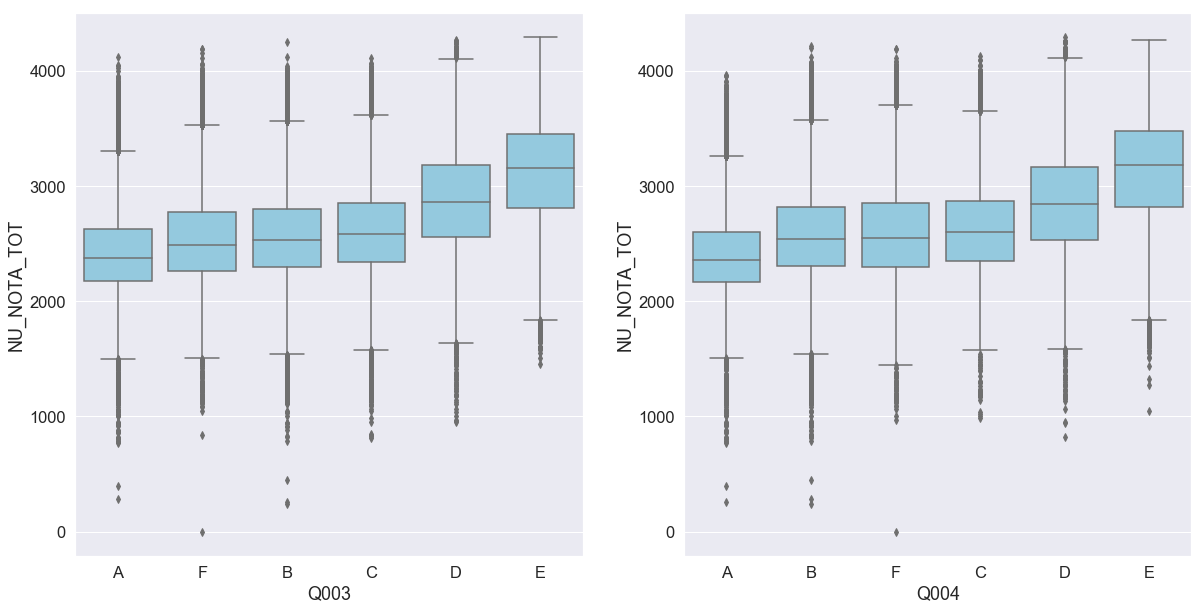

In [25]:
# Criando box plot de distribuição das notas obtidas pelos participantes no ENEM 2018 de acordo com:

plt.figure(figsize = (20, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

# A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).
my_order = df.groupby(by = [col_list[13]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[13], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax1)

# A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).
my_order = df.groupby(by = [col_list[14]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[14], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax2)

<Figure size 1440x720 with 0 Axes>

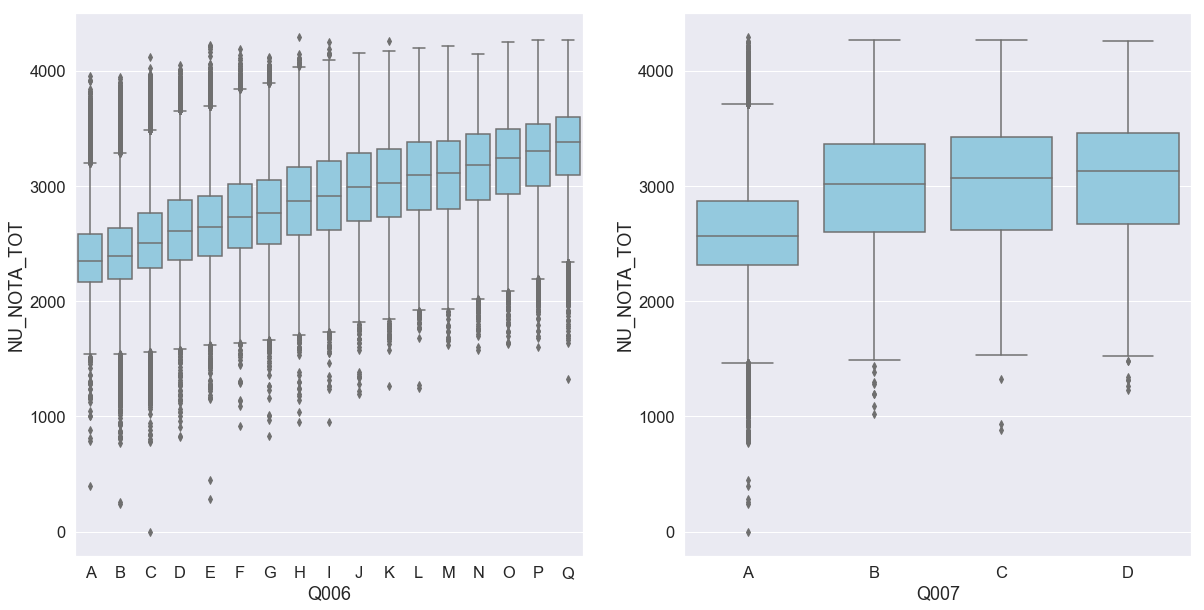

In [26]:
# Criando box plot de distribuição das notas obtidas pelos participantes no ENEM 2018 de acordo com:

plt.figure(figsize = (20, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

# Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
my_order = df.groupby(by = [col_list[15]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[15], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax1)

# Em sua residência trabalha empregado(a) doméstico(a)?
my_order = df.groupby(by = [col_list[16]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[16], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax2)

In [27]:
# Verificando estatísticas de resumo de acordo com a renda familiar mensal
aux = df.groupby(by = [col_list[15]])['NU_NOTA_TOT'].describe()
aux['median'] = df.groupby(by = [col_list[15]])['NU_NOTA_TOT'].median()
aux

,count,mean,std,min,25%,50%,75%,max,median
Q006,,,,,,,,,
A,44056.0,2389.328323,324.503778,400.0,2164.200,2345.50,2579.800,3959.2,2345.50
B,269180.0,2431.501219,328.135124,240.0,2196.900,2393.20,2634.700,3945.5,2393.20
C,268091.0,2540.851090,348.962965,0.0,2284.400,2509.00,2766.500,4122.1,2509.00
D,94425.0,2636.533900,371.375484,824.6,2361.100,2610.90,2879.100,4050.6,2610.90
E,103664.0,2670.407318,371.907429,280.0,2396.200,2648.40,2915.725,4228.1,2648.40
F,47686.0,2751.686250,389.981569,918.9,2464.825,2734.40,3016.600,4191.1,2734.40
G,81555.0,2785.023225,391.132965,831.5,2497.700,2769.50,3055.100,4120.7,2769.50
H,46687.0,2872.473954,406.503616,948.0,2577.900,2868.00,3163.350,4290.9,2868.00
I,42731.0,2918.173219,409.175955,953.6,2622.800,2917.20,3217.150,4246.7,2917.20


<Figure size 1440x720 with 0 Axes>

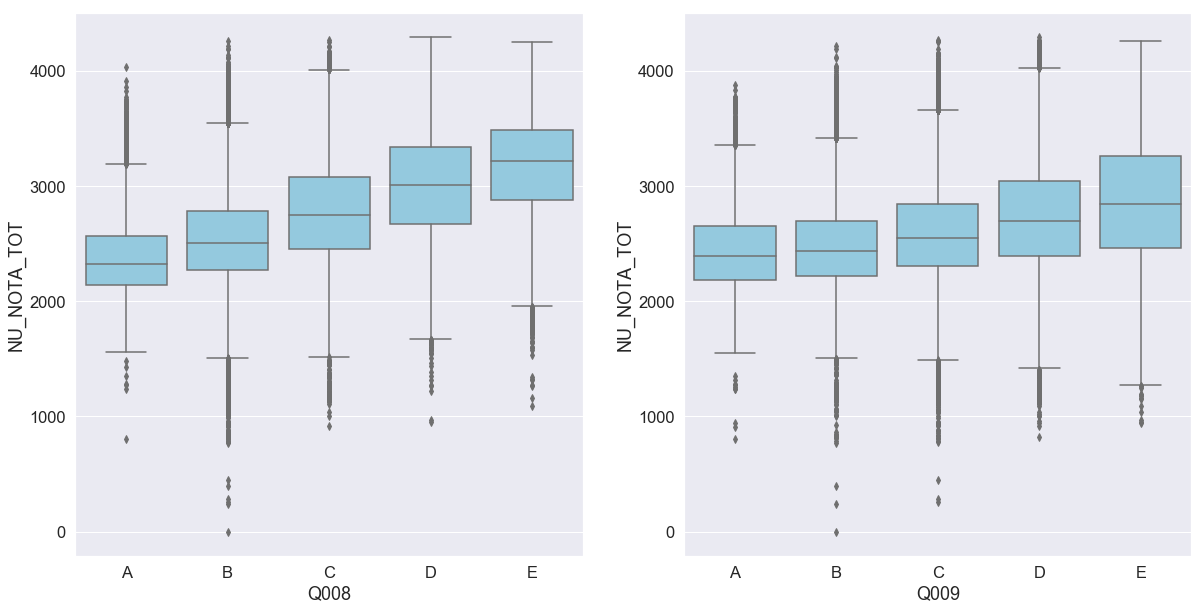

In [28]:
# Criando box plot de distribuição das notas obtidas pelos participantes no ENEM 2018 de acordo com:

plt.figure(figsize = (20, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

# Na sua residência tem banheiro?
my_order = df.groupby(by = [col_list[17]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[17], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax1)

# Na sua residência tem quartos para dormir?
my_order = df.groupby(by = [col_list[18]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[18], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax2)

<Figure size 1440x720 with 0 Axes>

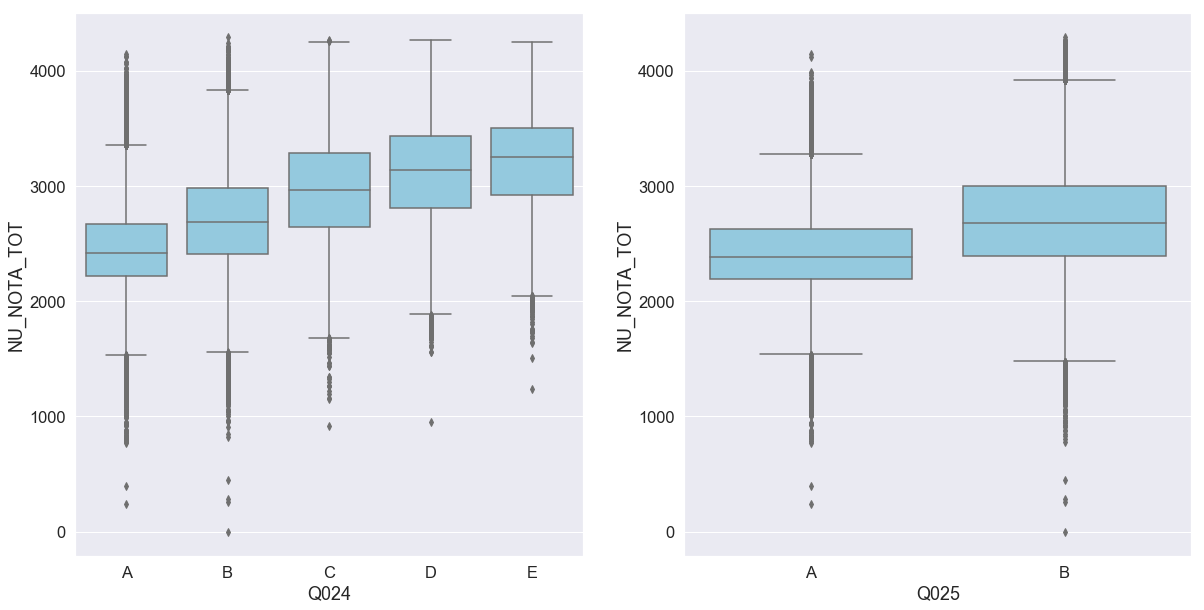

In [29]:
# Criando box plot de distribuição das notas obtidas pelos participantes no ENEM 2018 de acordo com:

plt.figure(figsize = (20, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

# Na sua residência tem computador?
my_order = df.groupby(by = [col_list[33]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[33], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax1)

# Na sua residência tem acesso à internet?
my_order = df.groupby(by = [col_list[34]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[34], y = 'NU_NOTA_TOT', data = df, order = my_order, color = "skyblue", ax = ax2)

In [30]:
# Verificando estatísticas de resumo de acordo com a posse de computador em casa 
aux = df.groupby(by = [col_list[33]])['NU_NOTA_TOT'].describe()
aux

,count,mean,std,min,25%,50%,75%,max
Q024,,,,,,,,
A,468502.0,2460.612874,340.242229,240.0,2215.90,2420.50,2671.6,4149.7
B,504822.0,2712.351925,403.222380,0.0,2411.20,2684.10,2981.5,4290.9
C,100617.0,2958.787311,431.856599,918.9,2643.70,2963.00,3286.2,4266.5
D,31859.0,3105.872441,425.792721,953.6,2813.35,3140.60,3433.1,4266.1
E,14154.0,3196.834584,413.939159,1238.6,2922.90,3250.75,3507.9,4255.1


In [31]:
# Verificando estatísticas de resumo de acordo com acesso à internet em casa
aux = df.groupby(by = [col_list[34]])['NU_NOTA_TOT'].describe()
aux

,count,mean,std,min,25%,50%,75%,max
Q025,,,,,,,,
A,271369.0,2422.418364,329.014700,240.0,2189.4,2382.7,2625.0,4149.7
B,848585.0,2718.160251,427.549844,0.0,2393.5,2679.4,3004.8,4290.9


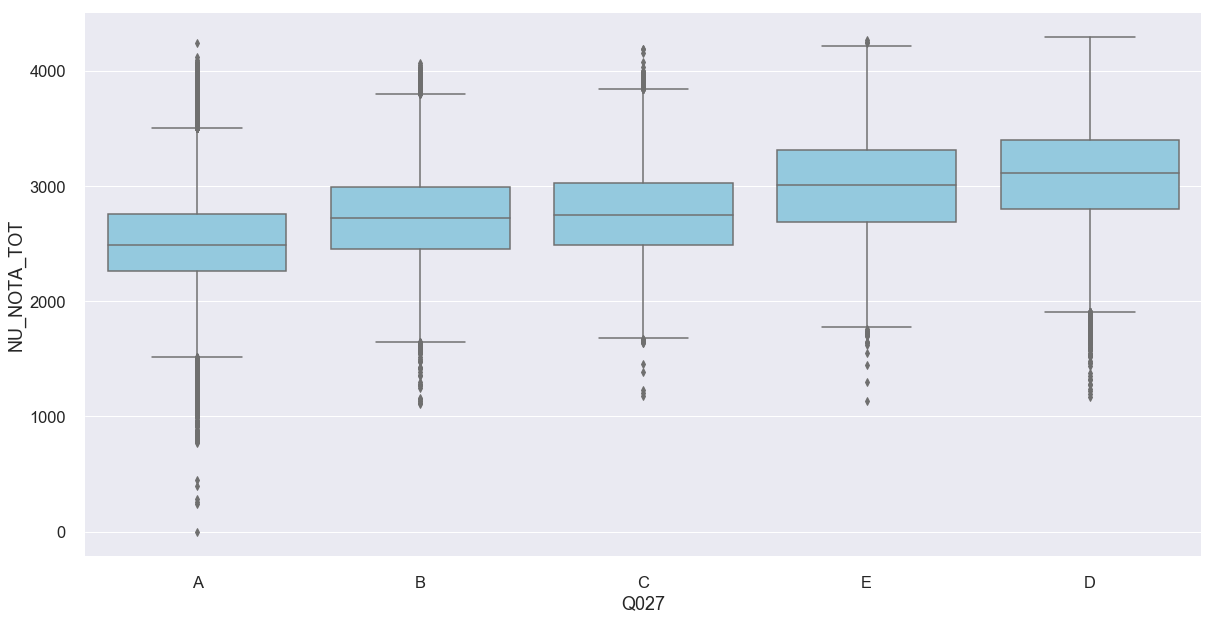

In [32]:
# Criando box plot de distribuição das notas obtidas pelos participantes no ENEM 2018 de acordo com:

plt.figure(figsize = (20, 10))

# Em que tipo de escola você frequentou o Ensino Médio?
my_order = df.groupby(by = [col_list[35]])['NU_NOTA_TOT'].median().sort_values(ascending = False).iloc[::-1].index
sns.boxplot(x = col_list[35], y = 'NU_NOTA_TOT', data = df, order = my_order, color="skyblue")
sns.despine(offset=10, trim=True)